# Working with NetCDF files

**In atmospheric science, we have a special data file format called NetCDF (.nc).** This specially designed data file format allows gridded atmospheric data to be saved easily with attributes and coordinates attached to each of the variables. Before we learn how to process them, let's take a quick look on how Python handle files. 

## General idea on file inputs and outputs
Suppose you want to read or write a text/binary file in your script, you will need the following functions to help you:
- open(*filename* \[, *access_mode*\]): Opens a file with the given *filename* under an access mode, e.g. "r" means read-only access, "w" means write-only access, and return the file object.

Syntax: 
```Python
fileObject = open(filename) # By default the access is read-only
```
- *fileObject*.read(*number*): Read the *number* of characters in the file (referenced by the file object).
- *fileObject*.readline( ): Read one line from the file and move to the next line.
- *fileObject*.write(*string*): Write the *string* to file.
- *fileObject*.close( ): Close the file.

These functions should have similar functionality in different languages, so you probably have learnt them before, and we will skip the details here.

## Using xarray to process NetCDF files
NetCDF files cannot be easily read using the default methods above. However, the good news is someone has already written relevant modules to allow users to read/write .nc files relatively easily. These packages can be easily installed when creating a new conda environment. I have provided the [environment.txt](./environment.txt) file, which specifies a list of packages to be used. Follow the installation guide for [Mac](./pre_lab_installation_guide_mac.md#Install-conda-environment-for-extra-packages)/[Windows](./pre_lab_installation_guide_Windows.md#Install-conda-environment-for-extra-packages) to install them.


The module we are going to use is called "xarray".

### Input from NetCDF files

In [1]:
# import library to read .nc files
import xarray as xr
# You can check that this can only be done inside the environment, but not outside.

In [2]:
# Open the dataset using the library
ds = xr.open_dataset('./misc/sample_data.nc')
print(type(ds)) # Note that this is a class called Dataset
print(ds)

<class 'xarray.core.dataset.Dataset'>
<xarray.Dataset>
Dimensions:  (lat: 73, level: 4, lon: 144, time: 28)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-15T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    temp     (time, level, lat, lon) float32 ...
    hgt      (time, level, lat, lon) float32 ...
    uwnd     (time, level, lat, lon) float32 ...
    vwnd     (time, level, lat, lon) float32 ...
    tempsfc  (time, lat, lon) float32 ...
    slp      (time, lat, lon) float32 ...
    uwndsfc  (time, lat, lon) float32 ...
    vwndsfc  (time, lat, lon) float32 ...
Attributes:
    Attribute1:  This attribute is manually added.
    Attribute2:  This attribute has no meaning.


Here we have just opened our data file, and `ds` is an xarray Dataset object (hereafter **Dataset**). It contains all information of a NetCDF file. To use it, just think of `ds` as a dictionary, and apply the dictionary syntax (recall [Part 1: Dictionary](./Part1_Basic_Syntax.ipynb#How-to-access-values-in-a-dictionary) ):
```
value = dictionary['key']
```
where the *key* is the name of variable here.

*Note: There is another function called `open_mfdataset()`, which allows you to open multiple .nc files.*

### Extracting a variable
Let's get the temperature variable `temp` from the dataset. 

In [3]:
da = ds['temp']
print(type(da)) # Note that this is a class called DataArray
print(da)

<class 'xarray.core.dataarray.DataArray'>
<xarray.DataArray 'temp' (time: 28, level: 4, lat: 73, lon: 144)>
[1177344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-15T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:     4xDaily Air temperature
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    level_desc:    Multiple levels
    statistic:     Individual Obs
    parent_stat:   Other
    valid_range:   [150. 350.]
    dataset:       NCEP Reanalysis
    actual_range:  [195.69998 324.6    ]


`da` is an xarray DataArray object (hereafter **DataArray**), which behaves like a NumPy array. Therefore you can use NumPy syntax to operate on this array (Learn them here: [Part 1b: NumPy Arrays](./Part1b_NumPy_Arrays.ipynb) or ask Google). However, it is functionally more than just NumPy array. You will see that there are **attributes** (sometimes called metadata) and **coordinates** attached to this object (Recall [Part 4: Objects](./Part4_OOP.ipynb#Attributes-and-Methods)). (You may also look at the attributes and coordinates of a **Dataset**.)

### Output to netCDF files
You may want to save a **Dataset** or **DataArray** to a netCDF file. They can be saved in a similar fashion.

**Syntax:**
```
DatasetObject.to_netcdf(filename)
DataArrayObject.to_netcdf(filename)
```

In [4]:
# Example
ds.to_netcdf('dataset_to_nc.nc')
da.to_netcdf('dataarray_to_nc.nc')
# list all files to see the .nc you just saved
!ls # Windows users please replace this by !dir

Example.ipynb                         README.md
Exercise.md                           dataarray_to_nc.nc
Part0_Introduction.md                 dataset_to_nc.nc
Part1_Basic_Syntax.ipynb              environment.txt
Part1b_NumPy_Array.ipynb              images
Part2_Writing_Script.ipynb            misc
Part3_Flow_Control.ipynb              new_temp.nc
Part4_OOP.ipynb                       pre_lab_installation_guide_Windows.md
Part5_Plotting.ipynb                  pre_lab_installation_guide_mac.md
Part5b_Advanced_Plotting.ipynb        sample_plot.png
Part6_xarray.ipynb


## Attributes
Suppose you want to access the attributes.

In [5]:
print(da.attrs) 
# Note that these are attributes, not methods, so you don't need a pair of brackets after .attrs

OrderedDict([('long_name', '4xDaily Air temperature'), ('units', 'degK'), ('precision', 2), ('GRIB_id', 11), ('GRIB_name', 'TMP'), ('var_desc', 'Air temperature'), ('level_desc', 'Multiple levels'), ('statistic', 'Individual Obs'), ('parent_stat', 'Other'), ('valid_range', array([150., 350.], dtype=float32)), ('dataset', 'NCEP Reanalysis'), ('actual_range', array([195.69998, 324.6    ], dtype=float32))])


In [6]:
print(da.attrs)

OrderedDict([('long_name', '4xDaily Air temperature'), ('units', 'degK'), ('precision', 2), ('GRIB_id', 11), ('GRIB_name', 'TMP'), ('var_desc', 'Air temperature'), ('level_desc', 'Multiple levels'), ('statistic', 'Individual Obs'), ('parent_stat', 'Other'), ('valid_range', array([150., 350.], dtype=float32)), ('dataset', 'NCEP Reanalysis'), ('actual_range', array([195.69998, 324.6    ], dtype=float32))])


This is again a dictionary. Again you can use the dictionary syntax for accessing and modifying the attributes.

In [7]:
# Example for accessing attributes
print(da.attrs['long_name'])

4xDaily Air temperature


In [8]:
# Example for adding new attribute
da.attrs['new_attribute'] = 'This attribute has no meaning.'
print(da.attrs)

OrderedDict([('long_name', '4xDaily Air temperature'), ('units', 'degK'), ('precision', 2), ('GRIB_id', 11), ('GRIB_name', 'TMP'), ('var_desc', 'Air temperature'), ('level_desc', 'Multiple levels'), ('statistic', 'Individual Obs'), ('parent_stat', 'Other'), ('valid_range', array([150., 350.], dtype=float32)), ('dataset', 'NCEP Reanalysis'), ('actual_range', array([195.69998, 324.6    ], dtype=float32)), ('new_attribute', 'This attribute has no meaning.')])


Suppose you want to change the unit from K to $^\circ$C. Then you will need to subtract the whole array by 273.15 and also change the *units* in attribute.

In [9]:
# Example for modifying attrbutes
da_degC = da - 273.15
print(da_degC)

<xarray.DataArray 'temp' (time: 28, level: 4, lat: 73, lon: 144)>
array([[[[ -0.837494, ...,  -0.837494],
         ...,
         [-48.649994, ..., -48.649994]],

        ...,

        [[-48.274994, ..., -48.274994],
         ...,
         [-70.649994, ..., -70.649994]]],


       ...,


       [[[  3.537506, ...,   3.537506],
         ...,
         [-37.524994, ..., -37.524994]],

        ...,

        [[-49.524994, ..., -49.524994],
         ...,
         [-71.462494, ..., -71.462494]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-15T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5


For whatever reason, the attributes won't be copied automatically to the new array. Let's do it manually

In [10]:
da_degC.attrs = da.attrs 
# Now we change the 'units' in attributes
da_degC.attrs['units'] = 'degC'
print(da_degC)
# You can see that the 'valid range' and 'actual range' should also be changed. 
# I changed the 'units' only for demonstration purpose.

<xarray.DataArray 'temp' (time: 28, level: 4, lat: 73, lon: 144)>
array([[[[ -0.837494, ...,  -0.837494],
         ...,
         [-48.649994, ..., -48.649994]],

        ...,

        [[-48.274994, ..., -48.274994],
         ...,
         [-70.649994, ..., -70.649994]]],


       ...,


       [[[  3.537506, ...,   3.537506],
         ...,
         [-37.524994, ..., -37.524994]],

        ...,

        [[-49.524994, ..., -49.524994],
         ...,
         [-71.462494, ..., -71.462494]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-15T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:      4xDaily Air temperature
    units:          degC
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    level_d

## Coordinates
You may access the coordinates from either the **Dataset** or the **DataArray**, again using dictionary syntax.

In [11]:
print(ds.coords['lat'])

<xarray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y
    actual_range:   [ 90. -90.]


In [12]:
print(da.coords['lat'])

<xarray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y
    actual_range:   [ 90. -90.]


In [13]:
# You may check to see if they are identical or not.
all(ds.coords['lat'] == da.coords['lat']) 

True

And once again, each of the coordinates itself is an **DataArray**, so you may want to [revisit the syntax again](#Extracting-a-variable).

## Commonly used functions
Commonly used functions/methods include: 
- `all()`, `any()`, `floor()`, `ceil()` (Python pre-defined functions)
- `sqrt()`,`sin()`, `cos()`, `tan()`, `exp()`, `log()`, `log10()`, `isnan()`, `isinf()`, `isfinite()` (NumPy functions)
- `max()`, `min()`, `mean()`, `median()`, `sum()`, `std()`, `var()`, `cumsum()`, `where()`, `isin()` (DataArray methods)

Here we highlight the usage of a few DataArray methods.

In [14]:
# Check whether the input elements exist in the DataArray
print(da.coords['lat'].isin([30,31,32,33,34,35]))

<xarray.DataArray 'lat' (lat: 73)>
array([False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False])
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0


In [15]:
# Grabs the DataArray with latitude > 30N
print(da.where(da.coords['lat']>30, drop=True))

<xarray.DataArray (time: 28, level: 4, lat: 24, lon: 144)>
array([[[[272.3125, ..., 272.3125],
         ...,
         [304.375 , ..., 305.    ]],

        ...,

        [[224.875 , ..., 224.875 ],
         ...,
         [215.375 , ..., 215.    ]]],


       ...,


       [[[276.6875, ..., 276.6875],
         ...,
         [313.8125, ..., 314.3125]],

        ...,

        [[223.625 , ..., 223.625 ],
         ...,
         [216.125 , ..., 216.8125]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-15T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 42.5 40.0 37.5 35.0 32.5
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:      4xDaily Air temperature
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    level_desc:     Multiple levels
    statistic

In [16]:
# zonal and meridional average
print(da.mean(dim=['lat','lon']))

<xarray.DataArray 'temp' (time: 28, level: 4)>
array([[281.39578, 275.18787, 253.85814, 218.18857],
       [281.6146 , 275.21237, 253.89842, 218.38457],
       [282.10748, 275.5162 , 253.957  , 218.11581],
       [281.88086, 275.44775, 254.00067, 218.22134],
       [281.5681 , 275.57022, 254.05455, 217.926  ],
       [281.93692, 275.67026, 254.02376, 218.09975],
       [282.469  , 276.03195, 254.12134, 218.0158 ],
       [282.35092, 276.04654, 254.11916, 218.13075],
       [282.12708, 276.15933, 254.17697, 217.94223],
       [282.29614, 276.01248, 254.18707, 218.18422],
       [282.5739 , 276.1026 , 254.26439, 217.99544],
       [282.31952, 275.95047, 254.22838, 218.18091],
       [282.11438, 276.0245 , 254.17963, 218.11572],
       [282.18927, 275.77277, 254.09247, 218.37453],
       [282.5047 , 275.84613, 254.0733 , 218.168  ],
       [282.1721 , 275.69055, 254.09465, 218.3844 ],
       [281.88623, 275.59415, 254.05417, 218.28963],
       [282.04572, 275.4961 , 253.99966, 218.4629 ],

## Index slicing
As mentioned above, you can apply (most of) NumPy syntax, e.g. index slicing, on **DataArray**.

In [17]:
# Let's look at the temperature data again
print(da)

<xarray.DataArray 'temp' (time: 28, level: 4, lat: 73, lon: 144)>
array([[[[272.3125, ..., 272.3125],
         ...,
         [224.5   , ..., 224.5   ]],

        ...,

        [[224.875 , ..., 224.875 ],
         ...,
         [202.5   , ..., 202.5   ]]],


       ...,


       [[[276.6875, ..., 276.6875],
         ...,
         [235.625 , ..., 235.625 ]],

        ...,

        [[223.625 , ..., 223.625 ],
         ...,
         [201.6875, ..., 201.6875]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-15T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:      4xDaily Air temperature
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    level_desc:     Multiple levels
    sta

Suppose you want the values for the lowest model level, in this case 1000hPa.

In [18]:
print(da[:,0,:,:])

<xarray.DataArray 'temp' (time: 28, lat: 73, lon: 144)>
array([[[272.3125, 272.3125, ..., 272.3125, 272.3125],
        [270.125 , 270.125 , ..., 270.125 , 270.125 ],
        ...,
        [224.    , 223.625 , ..., 224.625 , 224.3125],
        [224.5   , 224.5   , ..., 224.5   , 224.5   ]],

       [[272.875 , 272.875 , ..., 272.875 , 272.875 ],
        [270.875 , 270.875 , ..., 270.8125, 270.8125],
        ...,
        [224.3125, 223.875 , ..., 225.125 , 224.6875],
        [225.125 , 225.125 , ..., 225.125 , 225.125 ]],

       ...,

       [[275.6875, 275.6875, ..., 275.6875, 275.6875],
        [273.875 , 273.875 , ..., 273.8125, 273.875 ],
        ...,
        [232.625 , 232.1875, ..., 233.375 , 233.    ],
        [237.5   , 237.5   , ..., 237.5   , 237.5   ]],

       [[276.6875, 276.6875, ..., 276.6875, 276.6875],
        [275.125 , 275.125 , ..., 275.125 , 275.125 ],
        ...,
        [231.1875, 230.8125, ..., 232.    , 231.625 ],
        [235.625 , 235.625 , ..., 235.625 , 235.

However, this is not very convenient if you don't know the coordinates at the first place (in other words, you need to know the coordinates first). 

Instead the xarray DataArray object offers a **grid-independent** *method* of index slicing. That means you only need to know what coordinates the array has (but not the order of coordinates), and you can grab a slice of the array that you need. 

**Syntax**: (**SEL**ect by coordinate name and **I**ndex)
```
values = DataArrayObject.isel(coordinate_name = coordinate_index)
```
**Syntax**: (**SEL**ect by coordinate name and value)
```
values = DataArrayObject.sel(coordinate_name = coordinate_value)
```

However, you should **NOT** edit the **DataArray** directly using these two methods.

In [19]:
# Again, let's choose the lowest model level
print(da.isel(level=0))

<xarray.DataArray 'temp' (time: 28, lat: 73, lon: 144)>
array([[[272.3125, 272.3125, ..., 272.3125, 272.3125],
        [270.125 , 270.125 , ..., 270.125 , 270.125 ],
        ...,
        [224.    , 223.625 , ..., 224.625 , 224.3125],
        [224.5   , 224.5   , ..., 224.5   , 224.5   ]],

       [[272.875 , 272.875 , ..., 272.875 , 272.875 ],
        [270.875 , 270.875 , ..., 270.8125, 270.8125],
        ...,
        [224.3125, 223.875 , ..., 225.125 , 224.6875],
        [225.125 , 225.125 , ..., 225.125 , 225.125 ]],

       ...,

       [[275.6875, 275.6875, ..., 275.6875, 275.6875],
        [273.875 , 273.875 , ..., 273.8125, 273.875 ],
        ...,
        [232.625 , 232.1875, ..., 233.375 , 233.    ],
        [237.5   , 237.5   , ..., 237.5   , 237.5   ]],

       [[276.6875, 276.6875, ..., 276.6875, 276.6875],
        [275.125 , 275.125 , ..., 275.125 , 275.125 ],
        ...,
        [231.1875, 230.8125, ..., 232.    , 231.625 ],
        [235.625 , 235.625 , ..., 235.625 , 235.

In [20]:
# Get the data at 30N,60E
print(da.sel(lat=30,lon=60))

<xarray.DataArray 'temp' (time: 28, level: 4)>
array([[301.6875, 300.1875, 266.875 , 226.1875],
       [314.375 , 302.375 , 266.5   , 227.    ],
       [320.375 , 308.3125, 266.125 , 225.8125],
       [313.    , 305.8125, 266.125 , 227.8125],
       [302.6875, 300.8125, 266.    , 225.125 ],
       [316.6875, 304.125 , 266.    , 226.3125],
       [322.6875, 310.375 , 266.3125, 226.    ],
       [314.8125, 307.5   , 266.6875, 226.6875],
       [304.1875, 301.625 , 266.1875, 225.    ],
       [316.625 , 304.1875, 266.625 , 224.6875],
       [322.3125, 310.    , 267.375 , 224.625 ],
       [313.5   , 306.625 , 268.1875, 225.1875],
       [304.1875, 301.    , 267.625 , 223.6875],
       [317.1875, 304.375 , 267.375 , 224.375 ],
       [322.875 , 310.5   , 267.8125, 224.8125],
       [314.8125, 307.6875, 268.3125, 225.3125],
       [306.3125, 302.    , 267.6875, 224.8125],
       [317.375 , 305.3125, 266.8125, 224.875 ],
       [324.3125, 312.3125, 267.1875, 224.625 ],
       [319.    , 310.

This is useful, but if you try other combinations, which the values may be absent from the coordinate array, then you will get an error. 

Fortunately, the developers have prepared for this situation. You can use an extra input argument `method='nearest'` to choose the data at the nearest coordinate.

In [21]:
print(da.sel(lat=22.3,lon=114,method='nearest'))

<xarray.DataArray 'temp' (time: 28, level: 4)>
array([[299.8125, 292.875 , 269.3125, 221.875 ],
       [303.    , 294.1875, 269.3125, 223.    ],
       [301.1875, 294.3125, 269.6875, 222.8125],
       [299.375 , 292.625 , 269.8125, 222.5   ],
       [299.375 , 292.5   , 269.375 , 222.375 ],
       [301.5   , 293.125 , 269.875 , 223.3125],
       [301.5   , 294.8125, 271.    , 223.1875],
       [298.6875, 292.625 , 270.375 , 223.3125],
       [300.375 , 294.125 , 270.125 , 223.3125],
       [302.5   , 294.8125, 270.1875, 223.6875],
       [302.625 , 295.625 , 270.5   , 223.6875],
       [300.    , 294.125 , 270.125 , 223.875 ],
       [299.8125, 293.3125, 270.375 , 223.5   ],
       [301.125 , 292.125 , 270.625 , 224.875 ],
       [301.375 , 293.125 , 271.    , 224.875 ],
       [300.1875, 292.8125, 270.5   , 224.6875],
       [300.375 , 292.6875, 269.6875, 224.125 ],
       [302.1875, 293.375 , 269.1875, 224.6875],
       [301.375 , 293.8125, 269.875 , 223.375 ],
       [300.625 , 292.

Does these methods work with multiple indices/values? Let's try them.

In [22]:
# Well, this is the Pythonic way to do index slicing, so it should work very fine.
print(da[:4,:,:36,:])

<xarray.DataArray 'temp' (time: 4, level: 4, lat: 36, lon: 144)>
array([[[[272.3125, ..., 272.3125],
         ...,
         [299.125 , ..., 298.875 ]],

        ...,

        [[224.875 , ..., 224.875 ],
         ...,
         [220.8125, ..., 221.1875]]],


       ...,


       [[[274.5   , ..., 274.5   ],
         ...,
         [299.625 , ..., 299.5   ]],

        ...,

        [[221.6875, ..., 221.6875],
         ...,
         [222.125 , ..., 222.3125]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-09T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 12.5 10.0 7.5 5.0 2.5
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:      4xDaily Air temperature
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    level_desc:     Multiple levels
    statis

Next, let's try the `isel` method:

In [23]:
# You may try using similar syntax, e.g. 0:3, as indices
da.isel(lat=0:3)
# However you will see that it does not work. 
# It's because 0:3 is not a valid syntax that gives a value for input arguments. (Note that isel is a method/function)

SyntaxError: invalid syntax (<ipython-input-23-53938908810c>, line 2)

In [24]:
# Instead you need to provide a list (or something similar)
print(da.isel(lat=range(36), time=range(4)))

<xarray.DataArray 'temp' (time: 4, level: 4, lat: 36, lon: 144)>
array([[[[272.3125, ..., 272.3125],
         ...,
         [299.125 , ..., 298.875 ]],

        ...,

        [[224.875 , ..., 224.875 ],
         ...,
         [220.8125, ..., 221.1875]]],


       ...,


       [[[274.5   , ..., 274.5   ],
         ...,
         [299.625 , ..., 299.5   ]],

        ...,

        [[221.6875, ..., 221.6875],
         ...,
         [222.125 , ..., 222.3125]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-09T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 12.5 10.0 7.5 5.0 2.5
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:      4xDaily Air temperature
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    level_desc:     Multiple levels
    statis

Before using the `sel()` or `isel()` methods, it seems clearer to first organize the indices using a dictionary.

In [25]:
import numpy as np
# still remember how to initialize a dictionary? It is curly brackets {}
indices = {'lat':np.arange(30,60,2.5), 'lon':np.arange(0,180,10)}
print(indices)

{'lat': array([30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. , 52.5, 55. ,
       57.5]), 'lon': array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170])}


In [26]:
print(da.sel(indices, method='nearest'))
# Note that you cannot put method inside the dictionary.

<xarray.DataArray 'temp' (time: 28, level: 4, lat: 12, lon: 18)>
array([[[[304.8125, ..., 293.875 ],
         ...,
         [285.375 , ..., 278.8125]],

        ...,

        [[217.3125, ..., 222.1875],
         ...,
         [227.6875, ..., 229.625 ]]],


       ...,


       [[[315.    , ..., 296.875 ],
         ...,
         [286.6875, ..., 279.3125]],

        ...,

        [[218.8125, ..., 220.625 ],
         ...,
         [233.    , ..., 221.3125]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-15T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 30.0 32.5 35.0 37.5 40.0 ... 47.5 50.0 52.5 55.0 57.5
  * lon      (lon) float32 0.0 10.0 20.0 30.0 40.0 ... 140.0 150.0 160.0 170.0
Attributes:
    long_name:      4xDaily Air temperature
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    level_desc:     Multiple levels
    

*Short exercise*:
Try to shift the latitude by 1 degree and see what xarray will choose for you.
e.g. 
```Python
indices = {'lat':np.arange(31,61,2.5), 'lon':np.arange(0,180,10)}
print(da.sel(indices, method='nearest'))
```

*Think more:*

How to choose the steps in the `np.arange()`? What happens if the chosen step is too small? Note that the `sel()` method does not interpolate the array.

### Time coordinate handling
You may have noticed that the time coordinate has a data type called *datetime64*. Let's learn how we can manipulate it. We will start off by looking at one of the dependencies of xarray, namely **pandas**. This is also a very popular library in data science.

In [27]:
import pandas as pd
dates = pd.date_range(start='2019-01-14 06:00',periods=5,freq='6H')
print(dates)
print(dates+1) # every index shift by 1 period (6 hours)

DatetimeIndex(['2019-01-14 06:00:00', '2019-01-14 12:00:00',
               '2019-01-14 18:00:00', '2019-01-15 00:00:00',
               '2019-01-15 06:00:00'],
              dtype='datetime64[ns]', freq='6H')
DatetimeIndex(['2019-01-14 12:00:00', '2019-01-14 18:00:00',
               '2019-01-15 00:00:00', '2019-01-15 06:00:00',
               '2019-01-15 12:00:00'],
              dtype='datetime64[ns]', freq='6H')


In [28]:
dates_new = pd.date_range(start='2019-01-16 06:00',end='20190131',freq='D')
print(dates_new)

DatetimeIndex(['2019-01-16 06:00:00', '2019-01-17 06:00:00',
               '2019-01-18 06:00:00', '2019-01-19 06:00:00',
               '2019-01-20 06:00:00', '2019-01-21 06:00:00',
               '2019-01-22 06:00:00', '2019-01-23 06:00:00',
               '2019-01-24 06:00:00', '2019-01-25 06:00:00',
               '2019-01-26 06:00:00', '2019-01-27 06:00:00',
               '2019-01-28 06:00:00', '2019-01-29 06:00:00',
               '2019-01-30 06:00:00'],
              dtype='datetime64[ns]', freq='D')


There are several things I should mention here. 
1. date/time format: strings that looks like a date, e.g. `'2017/01/01 00:00:00'`, `'2017-01-01'`, `'20170101`, etc. Try what you think should work.
1. `start` and `end` arguments: the date/time denoting the start and end of the list (DatetimeIndex). Unlike Python lists, both ends are inclusive (although an extra argument can change that).
1. `freq` argument: a string denoting the difference between two indices. Commonly used strings: 
    - AS: year start frequency
    - MS: month start frequency
    - W: weekly frequency
    - D: daily frequency
    - H: hourly frequency 
    
   An integer in front would denote the number of multiples of it, e.g. `'6H'` means 6-hourly.
1. `periods` argument: an integer number of `freq` to repeat.

This is not the end of the datetime magic! The **DatetimeIndex** contains attributes and methods which allow you to quickly convert the dates to months,days of year, days of week, etc.

In [29]:
# Attributes
print(dates.year)
print(dates.month)
print(dates.day)
print(dates.hour)
print(dates.dayofyear)
print(dates.dayofweek) # index starts at 0

Int64Index([2019, 2019, 2019, 2019, 2019], dtype='int64')
Int64Index([1, 1, 1, 1, 1], dtype='int64')
Int64Index([14, 14, 14, 15, 15], dtype='int64')
Int64Index([6, 12, 18, 0, 6], dtype='int64')
Int64Index([14, 14, 14, 15, 15], dtype='int64')
Int64Index([0, 0, 0, 1, 1], dtype='int64')


In [30]:
# Methods
print(dates.month_name())
print(dates.day_name())

Index(['January', 'January', 'January', 'January', 'January'], dtype='object')
Index(['Monday', 'Monday', 'Monday', 'Tuesday', 'Tuesday'], dtype='object')


Moreover, in xarray, `time.season` is also available (`'DJF'`/`'MAM'`/`'JJA'`/`'SON'`).

So now let's use similar framework to work with **DataArray** time coordinates. Firstly, let's look at the `isel()` and `sel()` methods.

In [31]:
# Get the 2nd and 3rd value
print(da.isel(time=[1,2]))

<xarray.DataArray 'temp' (time: 2, level: 4, lat: 73, lon: 144)>
array([[[[272.875 , ..., 272.875 ],
         ...,
         [225.125 , ..., 225.125 ]],

        ...,

        [[224.125 , ..., 224.125 ],
         ...,
         [203.1875, ..., 203.1875]]],


       [[[273.625 , ..., 273.625 ],
         ...,
         [227.3125, ..., 227.3125]],

        ...,

        [[222.875 , ..., 222.875 ],
         ...,
         [202.6875, ..., 202.6875]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09T06:00:00 2017-06-09T12:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:      4xDaily Air temperature
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    level_desc:     Multiple levels
    statistic:   

When it comes to the `sel()` method, you can provide a 'datetime' formatted string (which grabs all indices that fit the string), or a **DatetimeIndex**.

In [32]:
# Grab the values on the day 09 June 2017
print(da.sel(time='2017-06-09'))

<xarray.DataArray 'temp' (time: 4, level: 4, lat: 73, lon: 144)>
array([[[[272.3125, ..., 272.3125],
         ...,
         [224.5   , ..., 224.5   ]],

        ...,

        [[224.875 , ..., 224.875 ],
         ...,
         [202.5   , ..., 202.5   ]]],


       ...,


       [[[274.5   , ..., 274.5   ],
         ...,
         [225.375 , ..., 225.375 ]],

        ...,

        [[221.6875, ..., 221.6875],
         ...,
         [203.3125, ..., 203.3125]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-09T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:      4xDaily Air temperature
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    level_desc:     Multiple levels
    stat

In [33]:
# Grab the values on the day 09 June 2017 using DatetimeIndex
date = pd.date_range(start='2017-06-09',periods=4,freq='6h')
print(da.sel(time=date))

<xarray.DataArray 'temp' (time: 4, level: 4, lat: 73, lon: 144)>
array([[[[272.3125, ..., 272.3125],
         ...,
         [224.5   , ..., 224.5   ]],

        ...,

        [[224.875 , ..., 224.875 ],
         ...,
         [202.5   , ..., 202.5   ]]],


       ...,


       [[[274.5   , ..., 274.5   ],
         ...,
         [225.375 , ..., 225.375 ]],

        ...,

        [[221.6875, ..., 221.6875],
         ...,
         [203.3125, ..., 203.3125]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-09T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:      4xDaily Air temperature
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    level_desc:     Multiple levels
    stat

We can also make use of the attributes and methods. Suppose we only want to look at Wednesday (`dayofweek==2`).

In [34]:
# A boolean mask array using the attribute
print(da.coords['time.dayofweek']==2)

<xarray.DataArray 'dayofweek' (time: 28)>
array([False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False])
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-15T18:00:00


In [35]:
# Use the mask array as index 
print(da[da.coords['time.dayofweek']==2])

<xarray.DataArray 'temp' (time: 4, level: 4, lat: 73, lon: 144)>
array([[[[274.875 , ..., 274.875 ],
         ...,
         [233.375 , ..., 233.375 ]],

        ...,

        [[223.8125, ..., 223.8125],
         ...,
         [203.8125, ..., 203.8125]]],


       ...,


       [[[275.3125, ..., 275.3125],
         ...,
         [240.6875, ..., 240.6875]],

        ...,

        [[222.8125, ..., 222.8125],
         ...,
         [200.8125, ..., 200.8125]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-14 ... 2017-06-14T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:      4xDaily Air temperature
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    level_desc:     Multiple levels
    stat

Our **Dataset** is not really a good example to show the use of attribute `season`, but the following shows how you may use it.

In [36]:
da[ds.coords['time.season']=='JJA']

<xarray.DataArray 'temp' (time: 28, level: 4, lat: 73, lon: 144)>
array([[[[272.3125, ..., 272.3125],
         ...,
         [224.5   , ..., 224.5   ]],

        ...,

        [[224.875 , ..., 224.875 ],
         ...,
         [202.5   , ..., 202.5   ]]],


       ...,


       [[[276.6875, ..., 276.6875],
         ...,
         [235.625 , ..., 235.625 ]],

        ...,

        [[223.625 , ..., 223.625 ],
         ...,
         [201.6875, ..., 201.6875]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-09 ... 2017-06-15T18:00:00
  * level    (level) float32 1000.0 850.0 500.0 200.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:      4xDaily Air temperature
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    level_desc:     Multiple levels
    sta

### Plotting DataArray on a map

Now you can combine the **DataArray** handling skills with plotting techniques that you learnt in previous part ([quick revision](./Part5_Plotting.ipynb#2D-Field-plots)) to make plots on a map.

Example:

In [37]:
# import libraries
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Text(0.5, 1.0, 'Air temperature at 1000hPa')

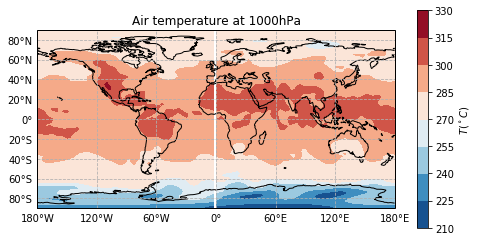

In [38]:
# Create a new figure object
fig = plt.figure(figsize=[8, 4])
# Create a new axes object with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())
# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()
# Draw the coastlines
ax.coastlines() # There might be download warnings the first time you use this.
# Draw the dashed gridlines and axis labels
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linestyle='--',
                 )
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Next you can do the plotting
plot = ax.contourf(da.coords['lon'],da.coords['lat'],da.isel(time=0,level=0),
                   cmap="RdBu_r",
                  )
fig.colorbar(plot, 
             ax=ax, 
#             orientation='horizontal',
             label='$T(^\circ C)$'
            )
ax.set_title('Air temperature at 1000hPa')

More examples on the [Research Computing in Earth Sciences series](https://rabernat.github.io/research_computing/intro-to-basemap.html) 

Remark: They are using Basemap, which is the ancestor of cartopy. I think you can just change the module name and things should work.